# Support Vector

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import make_classification

In [5]:
X,y=make_classification(n_samples=10000000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [23]:
X

array([[ 2.03851296, -1.78186766],
       [-0.79697592,  1.2596786 ],
       [ 1.13662531, -1.19944983],
       ...,
       [ 1.11195564, -1.17724266],
       [ 1.5985426 , -1.50326974],
       [-2.08612285,  0.3147464 ]])

In [31]:
y

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,

<Axes: xlabel='0', ylabel='1'>

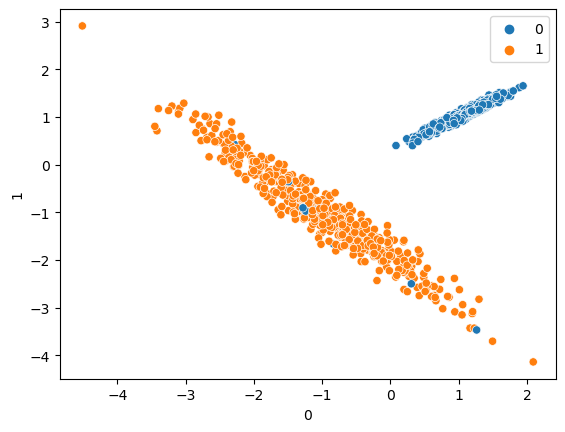

In [32]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [20]:
from sklearn.model_selection import train_test_split


In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
from sklearn.svm import SVC

In [38]:
svc=SVC(kernel='linear')

In [40]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [41]:
svc.coef_

array([[-0.8417854 , -0.86240955]])

In [42]:
y_pred=svc.predict(X_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [44]:
accuracy_score(y_test,y_pred)


0.996

In [45]:
confusion_matrix(y_test,y_pred)


array([[121,   1],
       [  0, 128]], dtype=int64)

In [46]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00       122\n           1       0.99      1.00      1.00       128\n\n    accuracy                           1.00       250\n   macro avg       1.00      1.00      1.00       250\nweighted avg       1.00      1.00      1.00       250\n'

# HyperParameter Tuning with SVC

In [47]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [48]:
from sklearn.model_selection import GridSearchCV

In [50]:
grid=GridSearchCV(SVC(),param_grid,refit=True,cv=5,verbose=3)

In [51]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.993 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.973 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.993 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.973 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [53]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [54]:
clf=SVC(C=0.1,gamma=1,kernel='linear')

In [55]:
clf.fit(X_train,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [56]:
y_pred=clf.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred)

0.996

In [58]:
confusion_matrix(y_test,y_pred)

array([[121,   1],
       [  0, 128]], dtype=int64)

In [59]:
y_pred=grid.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred)

0.996

# Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [22]:
X

array([[-1.04523188,  0.86374412],
       [-0.35604861, -0.72973383],
       [ 2.15202219, -0.13237642],
       ...,
       [-0.96475575,  0.88140798],
       [ 1.10487898, -0.22564867],
       [ 0.36672735, -2.01343085]])

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [6]:
from sklearn.svm import SVR

In [7]:
svr=SVR(kernel='linear')

In [8]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [9]:
y_pred=svr.predict(X_test)

In [10]:
from sklearn.metrics import r2_score

In [11]:
r2_score(y_test,y_pred)

0.9960337703654613